# Setting Up the Environment

In [ ]:
pip install numpy pandas matplotlib yfinance tensorflow scikit-learn

# Fetching Real Stock Data

In [11]:
import yfinance as yf
import pandas as pd

# Download data for Apple (AAPL)
data = yf.download('AAPL', start='2020-01-01', end='2026-01-01')
print(data.tail())


[*********************100%***********************]  1 of 1 completed

Price            Close        High         Low        Open    Volume
Ticker            AAPL        AAPL        AAPL        AAPL      AAPL
Date                                                                
2025-04-15  202.139999  203.509995  199.800003  201.860001  51343900
2025-04-16  194.270004  200.699997  192.369995  198.360001  59732400
2025-04-17  196.979996  198.830002  194.419998  197.199997  51334300
2025-04-21  193.160004  193.800003  189.809998  193.270004  46742500
2025-04-22  199.740005  201.589996  195.970001  196.119995  52660200


# Preparing Data for the LSTM Model

In [14]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler

# Select the 'Close' price
closing_prices = data['Close'].values.reshape(-1, 1)

# Normalize data
scaler = MinMaxScaler()
scaled_prices = scaler.fit_transform(closing_prices)

# Generate sequences
def create_sequences(data, window_size):
    X, y = [], []
    for i in range(len(data) - window_size):
        X.append(data[i:i+window_size])
        y.append(data[i+window_size])
    return np.array(X), np.array(y)

X, y = create_sequences(scaled_prices, window_size=60)


# Building and Training the LSTM Model

In [21]:
import tensorflow as tf
from sklearn.model_selection import train_test_split

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle=False, test_size=0.2)

# Build the model with an Input layer
model = tf.keras.Sequential([
    tf.keras.Input(shape=(X_train.shape[1], 1)),     
    tf.keras.layers.LSTM(100, return_sequences=True),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.LSTM(50, return_sequences=False),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(25),
    tf.keras.layers.Dense(1)
])

model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(X_train, y_train, epochs=20, batch_size=32, validation_split=0.1)


Epoch 1/20
29/29 ━━━━━━━━━━━━━━━━━━━━ 3s 37ms/step - loss: 0.0591 - val_loss: 7.3576e-04
Epoch 2/20
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - loss: 0.0040 - val_loss: 0.0030
Epoch 3/20
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - loss: 0.0027 - val_loss: 0.0013
Epoch 4/20
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - loss: 0.0024 - val_loss: 6.3900e-04
Epoch 5/20
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - loss: 0.0020 - val_loss: 6.1508e-04
Epoch 6/20
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - loss: 0.0021 - val_loss: 0.0012
Epoch 7/20
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - loss: 0.0022 - val_loss: 8.0266e-04
Epoch 8/20
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - loss: 0.0018 - val_loss: 0.0012
Epoch 9/20
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - loss: 0.0018 - val_loss: 0.0017
Epoch 10/20
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - loss: 0.0017 - val_loss: 5.2339e-04
Epoch 11/20
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - loss: 0.0017 - val_loss: 5.9183e-04
Epoch 12/20
29/29 ━━━━━━━━━━━━━━━━━━━━ 

# Making Predictions and Visualizing Results

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step


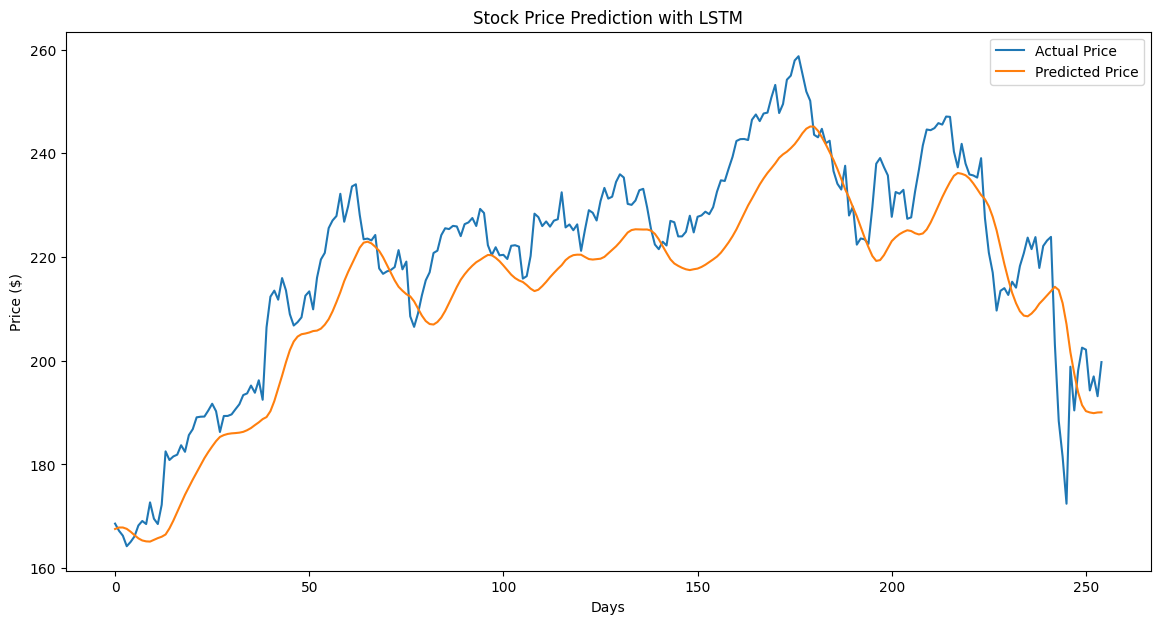

In [23]:
import matplotlib.pyplot as plt

predicted = model.predict(X_test)
predicted = scaler.inverse_transform(predicted)
actual = scaler.inverse_transform(y_test)

plt.figure(figsize=(14, 7))
plt.plot(actual, label='Actual Price')
plt.plot(predicted, label='Predicted Price')
plt.title('Stock Price Prediction with LSTM')
plt.xlabel('Days')
plt.ylabel('Price ($)')
plt.legend()
plt.show()
